## Example 6.1  page 72 from Dr.Georgoulis notes

CFL number is:  0.25
0.5
[[0.75 0.   0.   ... 0.   0.   0.25]
 [0.25 0.75 0.   ... 0.   0.   0.  ]
 [0.   0.25 0.75 ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.75 0.   0.  ]
 [0.   0.   0.   ... 0.25 0.75 0.  ]
 [0.   0.   0.   ... 0.   0.25 0.75]]


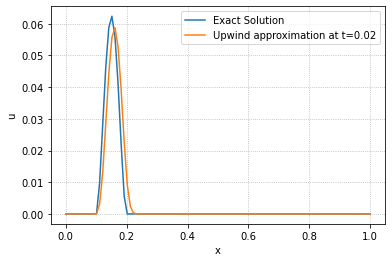

In [39]:
import numpy as np    
import matplotlib.pyplot as plt

class Advection1D:
    A=0
    def __init__(self, c, x0, xN, N, deltaT,T):
        self.c = c 
        self.x0 = x0   
        self.xN = xN 
        self.N = N   
        self.deltaT = deltaT   
        self.T = T       
   
    def CFL(self):
        deltaX= (self.xN - self.x0)/self.N
        return np.abs(self.c*self.deltaT/deltaX)
   

    def checkCFL(self):
        if (self.CFL()<=1):
            flag=True 
        else:
            flag=False
        return flag
   
    def upwindMatrixAssembly(self):
        alpha_min=min(self.CFL(),0)
        alpha_max=max(self.CFL(),0)
        a1=[alpha_max]*(self.N-1)
        a2=[1+alpha_min-alpha_max]*(self.N)
        a3=[-alpha_min]*(self.N-1)
        self.A=np.diag(a1, -1)+np.diag(a2, 0)+np.diag(a3, 1)
        self.A[0,-1]=alpha_max
        self.A[N-1,0]=-alpha_min

    def Solve(self,u0):
        return np.matmul(self.A,u0) 



# constants  
N,x0,xN,deltaT,c,T=100,0.,1.,1/200.0,1/2.,0.02
# initialization of constants
LA1D = Advection1D(c, x0, xN, N, deltaT,T) 

# initial value
x=np.linspace(LA1D.x0,LA1D.xN,LA1D.N)
u0=np.where( (0.1<x) & (x<0.2) , ((10**4)*(0.1-x)**2 *((0.2-x)**2))   ,0)

#plot of initial value    
plt.plot(x,u0,label="Exact Solution")
plt.ylabel('u')
plt.xlabel('x')
plt.legend()


# calculating solution if CFL<=1
if (LA1D.checkCFL() is True):
    print("CFL number is: ", LA1D.CFL())
    LA1D.upwindMatrixAssembly()
    for t in range(0,int(LA1D.T/LA1D.deltaT)):
        u=LA1D.Solve(u0)
        u0=u
else:
    print("CFL number is greater than 0.5. CFL: ", LA1D.CFL())

# ploting the last solution
plt.plot(x,u,label="Upwind approximation at t="+str(LA1D.T))
plt.legend()
plt.grid(linestyle='dotted')


print(deltaT/((xN - x0)/N))
print(LA1D.A)

## Problem 25 page 76 from Dr.Georgoulis notes

Let the PDE $$u_{t}+u_{x}=0$$
We consider the finite difference method : $$u_{i}^{n+1} = au_{i-1}^{n}+b u_{i}^{n}+ c u_{i+1}^{n}$$
for some $a,b,c \in \mathbb{R}.$ Determine the coefficients $a,b,c$ so that the corresponding truncation error is of as high an order as possible.

## Solution 


$$u_{i}^{n+1} = au_{i-1}^{n}+b u_{i}^{n}+ c u_{i+1}^{n}+E_{i}^{n}$$
$$-E_{i}^{n} = -u_{i}^{n+1}+ au_{i-1}^{n}+b u_{i}^{n}+ c u_{i+1}^{n}$$
\begin{equation}
E_{i}^{n} = u_{i}^{n+1} - a u_{i-1}^{n} - b u_{i}^{n} - c u_{i+1}^{n}
\end{equation}

\begin{equation}
u_{t_{n+1},X_{i}} = u(t_{n},x_{i}) +\tau u_{t}(t_{n},x_{i}) +\frac{\tau^{2}}{2!}u_{tt}(t_{n},x_{i})+\frac{\tau^{3}}{3!}u_{ttt}(t_{n},x_{i})+\dots
\end{equation}

\begin{equation}
u_{t_{n},X_{i+1}} = u(t_{n},x_{i}) + h u_{x}(t_{n},x_{i}) +\frac{h^{2}}{2!}u_{xx}(t_{n},x_{i}) + \frac{h^{3}}{3!}u_{xxx}(t_{n},x_{i})+\dots
\end{equation}

\begin{equation}
u_{t_{n},X_{i -1}} = u(t_{n},x_{i}) - h u_{x}(t_{n},x_{i}) +\frac{h^{2}}{2!}u_{xx}(t_{n},x_{i})  - \frac{h^{3}}{3!}u_{xxx}(t_{n},x_{i})+\dots
\end{equation}


Substituting (2),(3),(4) in (1) we get:

\begin{align*}
E_{i}^{n} =& u(t_{n},x_{i}) - \tau u_{t}(t_{n},x_{i}) +\frac{\tau^{2}}{2!}u_{tt}(t_{n},x_{i})+\frac{\tau^{3}}{3!}u_{ttt}(t_{n},x_{i}) \\
-& a u(t_{n},x_{i}) - h u_{x}(t_{n},x_{i}) +\frac{h^{2}}{2!}u_{xx}(t_{n},x_{i})  - \frac{h^{3}}{3!}u_{xxx}(t_{n},x_{i}) \\
-& b u(t_{n},x_{i}) \\
-& u(t_{n},x_{i}) + h u_{x}(t_{n},x_{i}) +\frac{h^{2}}{2!}u_{xx}(t_{n},x_{i}) + \frac{h^{3}}{3!}u_{xxx}(t_{n},x_{i})
\end{align*}

\begin{align*}
E_{i}^{n} =& u(t_{n},x_{i})(1-a-b-c)-(\tau +a h -c h)u_{x}(t_{n},x_{i}) \\
+& \left[ \frac{\tau^{2}}{2!}-(a+c) \frac{h^{2}}{2!} \right]u_{xx}(t_{n},x_{i}) \\
+& \left[\frac{\tau^{3}}{3!}-(a-c) \frac{h^{3}}{3!} \right]u_{xxx}(t_{n},x_{i})
\end{align*}

Setting $\mu = \frac{\tau}{h}$ we obtain : 

\begin{align*}
E_{i}^{n} =& u(t_{n},x_{i})(1-a-b-c)\\
-& h(\mu +a  -c )u_{x}(t_{n},x_{i}) \\
+& \left( \frac{h^{2}}{2!}(\mu^2 -(a+c)  \right)u_{xx}(t_{n},x_{i}) \\
+& \left[\frac{h^{3}}{3!}(\mu^3 -(a+c)\right]u_{xxx}(t_{n},x_{i})
\end{align*}



Therefore we have to solve the following homogeneous system of linear equation wrt $a,b,c$ (the term $(\mu^3 -(a+c)$ is ignored because is the same as the previous term but in cubic power): 
\begin{align*}
1-a-b-c =&0 \\
\mu +a -c=&0 \\
\mu^{2}-(a+c)=&0
\end{align*}

Alternate form: 

\begin{align*}
b =& 1-a-c \\
-a =& \mu -c => a = -\mu +c\\
c=& \mu^{2} -a
\end{align*}


Solving for c :

\begin{align*}
c =& \mu^{2} -a \\
c =& \mu^{2} -(-\mu+c) \\
c =&  \mu^{2} + \mu +c \\
2c =&   \mu (1+\mu)\\
c =&  \frac{\mu (1+\mu)}{2}
\end{align*}

Solving for a :
\begin{align*}
a=& -\mu +c \\
a=& -\mu + \frac{\mu (1+\mu)}{2} \\
a =& \frac{1}{2}\mu(1+\mu)-\mu \\
a =& \frac{1}{2}\mu +\frac{1}{2}\mu^{2}-\mu   \\
a =& \frac{\mu}{2} +\frac{\mu^{2}}{2} -\mu  \\
a =& \frac{\mu}{2} +\frac{\mu^{2}}{2} -\frac{2 \mu}{2}  \\
a =&  \frac{\mu+\mu^{2}-2 \mu}{2} \\
a =& \frac{\mu(\mu-1)}{2}  \\
a =& - \frac{\mu(-\mu+1)}{2}  \\
a =& -\frac{1}{2} \mu(1-\mu)  
\end{align*}




Solving for b : 
\begin{align*}
b=& 1-a-c \\
b=& 1-(-\frac{1}{2}\mu(1-\mu)) - (\frac{\mu (1+\mu)}{2}) \\
b=& 1-\mu^{2}
\end{align*}


Thus the three coefficients are: 
\begin{align*}
a =& -\frac{1}{2} \mu(1-\mu)  \\
b=& 1-\mu^{2} \\
c =&  \frac{\mu (1+\mu)}{2}
\end{align*}

Concluding we have that : 

$$u_{i}^{n+1} = -\frac{1}{2} \mu(1-\mu) u_{i-1}^{n}+ 1-\mu^{2} u_{i}^{n}+  \frac{\mu (1+\mu)}{2} u_{i+1}^{n}$$